### 푸리에 해석

푸리에 해석은 푸리에 변환을 통해 함수의 주기성에 관한 정보를 추출하는 분석 방법으로 그 결과, 즉 진동수들을 스펙트럼이라 부른다.

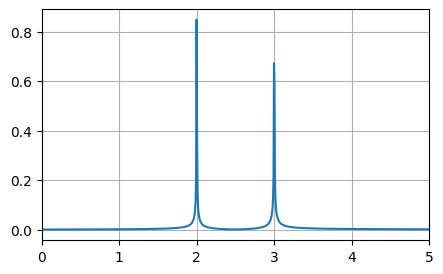

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

N = 100000
T = 0.01  # 샘플링 간격 (시간 단위)
X = np.linspace(0.0, N*T, N)

Y = np.cos(2.0 * X) + np.cos(3.0 * X)

Xf = np.fft.fftfreq(N, T)
Yf = scipy.fftpack.fft(Y)

plt.figure(figsize=(5, 3))
plt.plot(2*np.pi*Xf[:N//2], 2.0 / N * np.abs(Yf[:N // 2]))
plt.grid(True)
plt.xlim(0, 5)
plt.show()


### 리만 스펙트럼

아래와 같은 무한 삼각급수 $F(t)$를 생각해보자.

$$
F(t) := - \sum_{p^n}\frac{\log(p)}{p^{n/2}}\cos(t \log(p^n))
$$

위와 같은 삼각급수는 모든 소수 $p$의 거듭제곱 $p^n$들에 대한 로그를 진동수로 갖는 삼각급수라 할 수 있을 것이다.  
이를 시각화해보면 특정 값들에서 튀는 값들이 있는데 이들을 리만 스펙트럼이라 부른다.

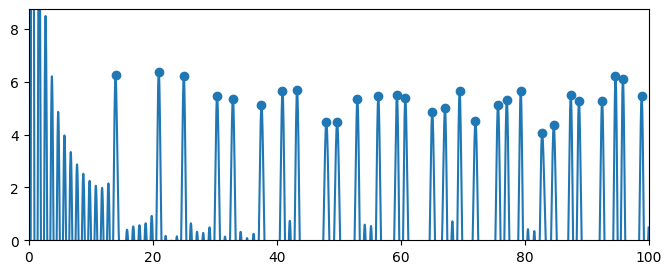

In [44]:
def is_prime(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    
    for i in range(3, int(n ** 0.5) + 1, 2):
        if n % i == 0:
            return False
    
    return True

C = 500 # 무한급수의 양상을 살펴보기 위한 절단값
P = list(filter(is_prime, range(2, C)))
PP = list(filter(lambda p: p[2]<C, sum([[(p, n, p ** n) for n in range(1, 10)] for p in P], start=[])))

@np.vectorize
def F(t):
    S = 0
    for p, n, pn in PP:
        S += np.log(p) / np.sqrt(pn) * np.cos(t*np.log(pn))
    return -S

X = np.linspace(0, 100, 10000)
Y = F(X)

plt.figure(figsize=(8, 3))
plt.plot(X, Y)

zero_crossings = np.where(np.diff(np.sign(np.diff(Y))))[0]
riemann_spectrum_indexes = []
for xz in zero_crossings:
    if 14 < X[xz] and 3 <Y[xz]:
        riemann_spectrum_indexes.append(xz)

riemann_spectrums = X[riemann_spectrum_indexes]
plt.scatter(X[riemann_spectrum_indexes], Y[riemann_spectrum_indexes])
plt.ylim(0, 8.75)
plt.xlim(0, 100)
plt.show()

위와 같이 얻은 스펙트럼을 진동수로 갖는 삼각함수들의 합을 생각해보자.  
그 결과는 아래와 같이 얻어낼 수 있을 것이다.

C:\Users\AbleSECU\AppData\Local\Temp\ipykernel_25476\567226582.py:6: RuntimeWarning: divide by zero encountered in log
  Y = -G(np.log(X))
C:\Users\AbleSECU\AppData\Local\Temp\ipykernel_25476\567226582.py:3: RuntimeWarning: invalid value encountered in cos
  return 1 + np.sum([np.cos(theta * t) for theta in riemann_spectrums])


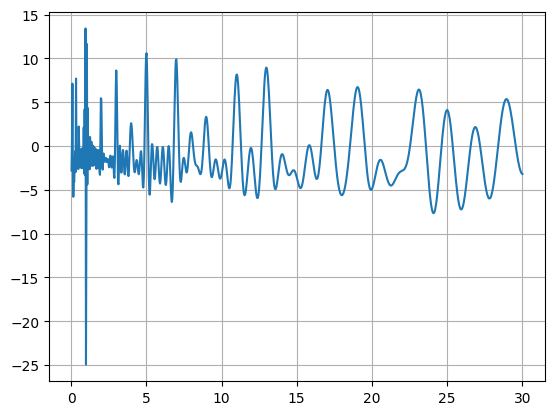

In [ ]:
@np.vectorize
def G(t):
    return 1 + np.sum([np.cos(theta * t) for theta in riemann_spectrums])

X = np.linspace(0, 30, 1000)
Y = -G(np.log(X)) 
plt.plot(X, Y)
plt.grid(True)
plt.show() # 본래는 소수의 거듭제곱 위치에 피크를 치는 그래프여야 함. 다만 계산한 스펙트럼 값들이 적은지라...